In [19]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [20]:
%matplotlib inline 

In [21]:
from astropy.io import fits
import sdss_dataset
import matplotlib.pyplot as plt
import numpy as np

In [22]:
from astropy.table import Table

In [23]:
catalog_file = '../../data/cosmoDC2_wld_sdss_10_sq_deg.fits'

In [24]:
data = Table.read(catalog_file)

# Fluxes

In [28]:
survey = sdss_dataset.sdss_survey
filt = survey.filters[0]

fluxes = sdss_dataset.get_flux(data['r_ab'], filt, survey)

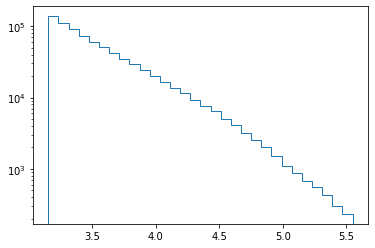

In [29]:
log_fluxes = np.log10(fluxes)
xmin, xmax = np.percentile(log_fluxes, [.1,99.9])
plt.hist(log_fluxes, bins=30, range=(xmin, xmax), histtype='step')
plt.yscale('log')

In [30]:
# Calculate the mean sky background level in detected electrons per pixel.
# seems consistent with stripe 82 (sky brightnessat an upper quantile of SDSS), since stripe 82 has faint surface brightness
mean_sky_level = sdss_dataset.get_flux(21.06, filt, survey)*survey.pixel_scale**2
print(mean_sky_level)

637.0665879316138


# Sizes

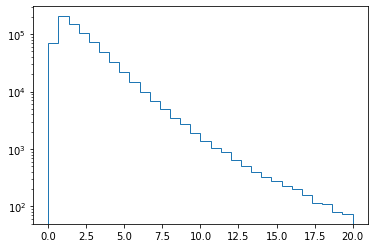

In [32]:
f = data["fluxnorm_bulge"] / (
    data["fluxnorm_disk"] + data["fluxnorm_bulge"]
)
r_sec = np.hypot(
    data["a_d"] * (1 - f) ** 0.5 * 4.66,
    data["a_b"] * f ** 0.5 * 1.46,
)
plt.hist(r_sec, bins=30, range=(0,20), histtype='step') # arcseconds.
plt.yscale('log')

# Example galaxies

In [39]:
from hydra.experimental import initialize, compose
def get_cfg(overrides):
    overrides = [f"{key}={value}" for key, value in overrides.items()]
    with initialize(config_path="../../config"):
        cfg = compose("config", overrides=overrides)
    return cfg


In [42]:
overrides = {'dataset':'sdss_galaxies'}
cfg = get_cfg(overrides)
dataset = sdss_dataset.SDSSGalaxies(cfg)

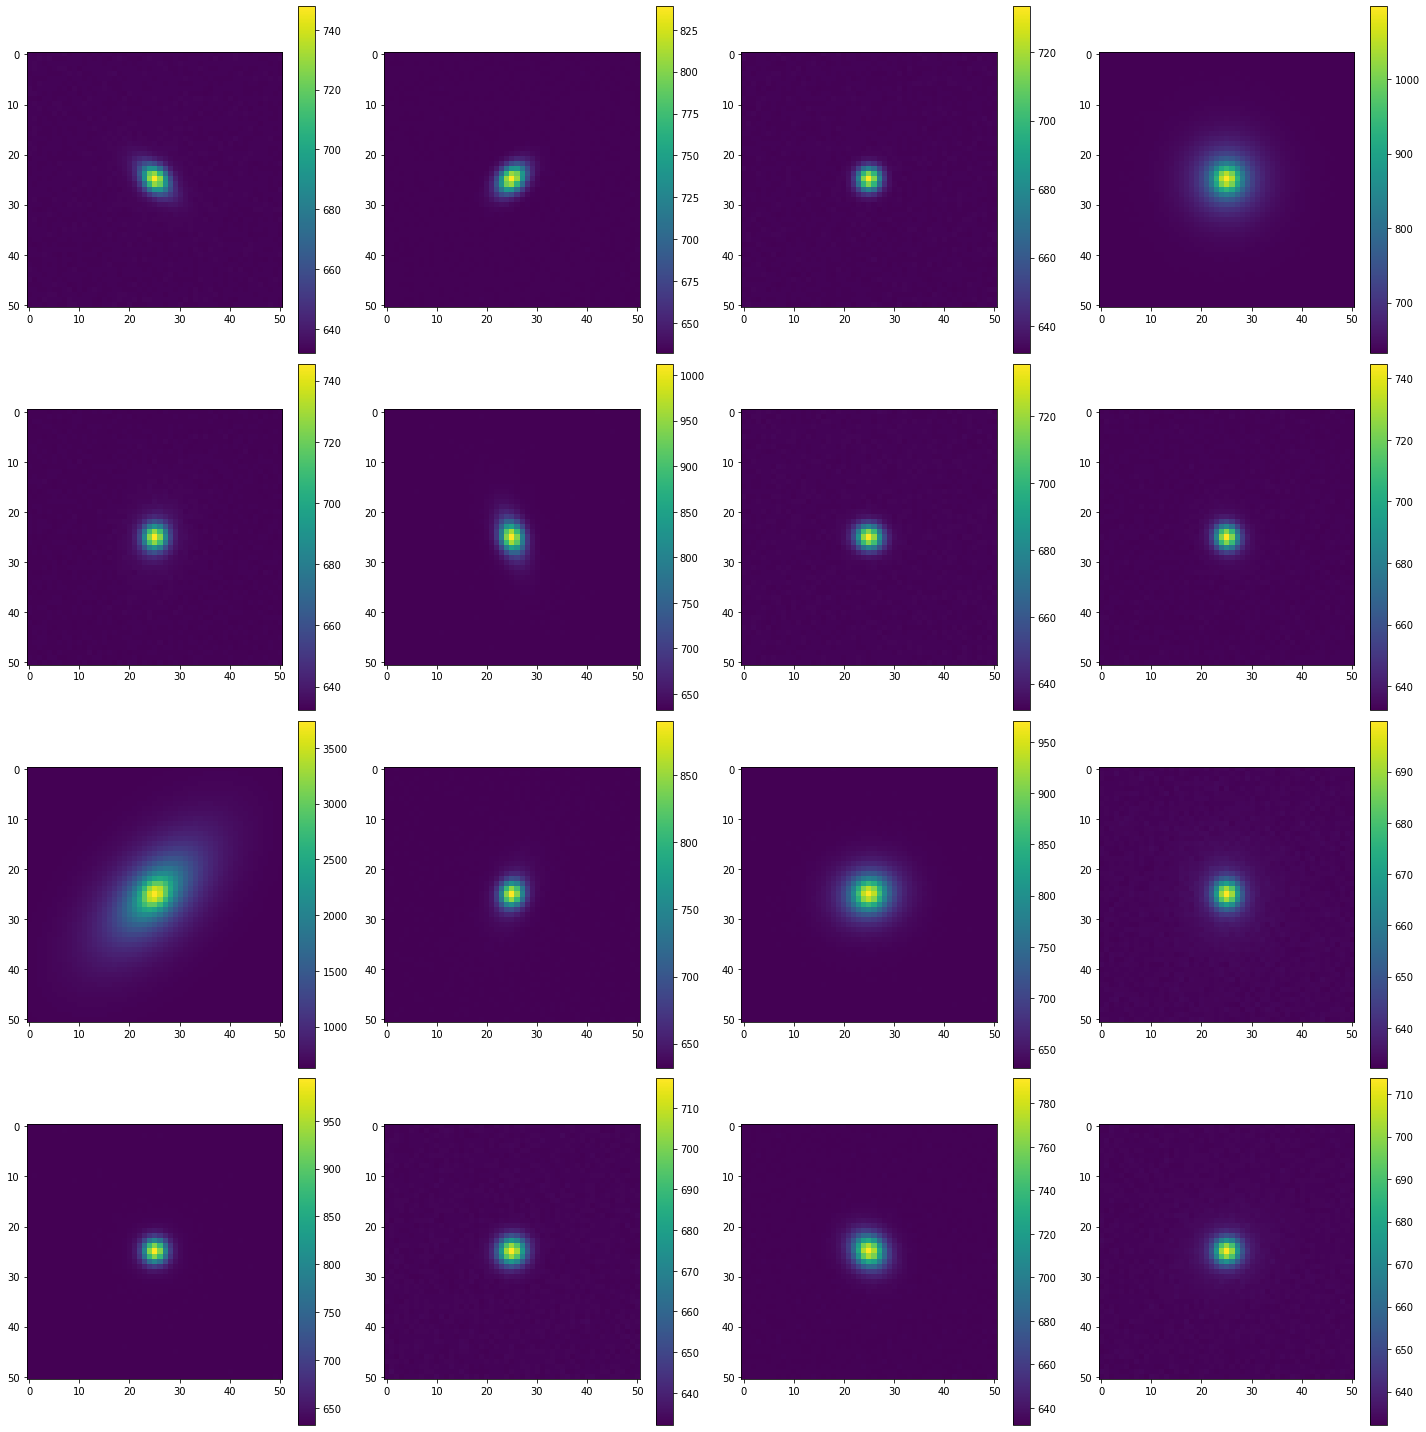

In [38]:
fig, axes = plt.subplots(4,4, figsize=(20, 20))

for ax in axes.flatten():
    idx = np.random.randint(len(dataset.catalog))
    ex = dataset[idx]
    im = ax.imshow(ex['images'][0])
    fig.colorbar(im, ax=ax)

plt.tight_layout()

## Max pixel

In [39]:
print(len(dataset.catalog))
max_pixels = []
for idx in range(len(dataset.catalog)):
    if idx %10000==0: 
        print(idx)
    max_pixels.append(max(dataset[idx]['images'].flatten()))

760450
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000


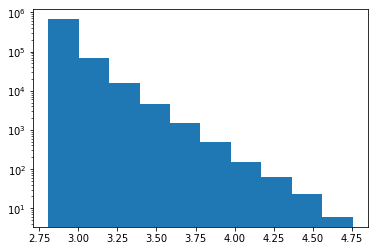

In [41]:
plt.hist(np.log10(max_pixels), bins=10)
plt.yscale('log')

## Try to obtain SDSS PSF with psf_at_points function (then redraw galaxies)

In [2]:
from sparse_field_lib import load_data

sdss_dir = '/home/imendoza/bliss/data/sdss/'
image, fits_file, wcs_list, sdss_data = load_data(sdss_dir=sdss_dir)
psf = sdss_data.rcfgcs[0][-1]
_psf = psf.psf_at_points(0, 450, 550)

import galsim
image = galsim.Image(_psf, scale=0.396) #sdss pixel_scale.
interp = galsim.InterpolatedImage(image)

interp.calculateFWHM()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '19/09/98' to '1998-09-19''. [astropy.wcs.wcs]


1.425650871818947